In [11]:
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import math
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def highpass(img, sigma):
    return img - cv2.GaussianBlur(img, (0,0), sigma) + 127

#Contour on RGB

In [4]:
n = 550

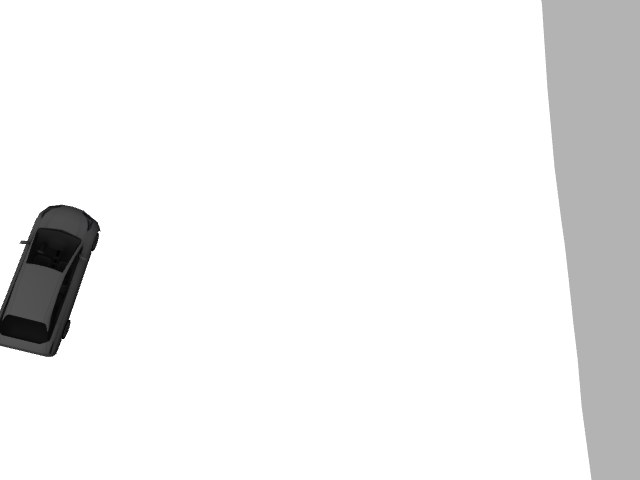

In [13]:
#RGB image from Drone Cam
filename = "/content/drive/MyDrive/rgb_car_22/"+str(n)+"rgb_data.png"
img = cv2.imread(filename)
cv2_imshow(img)

(480, 640)


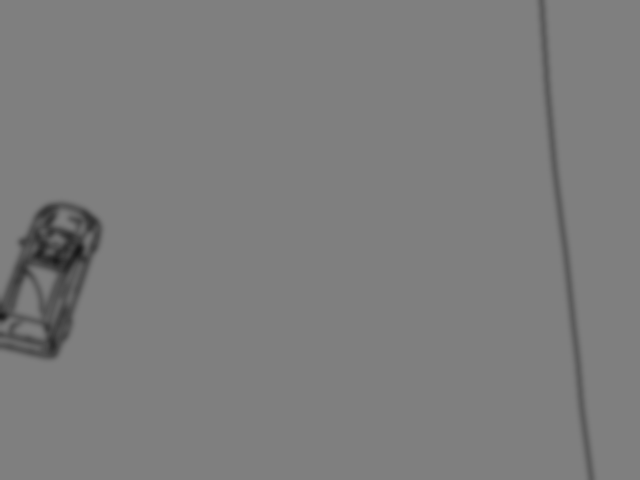

In [14]:
#Edge detection using Canny
aperture_size = 5
img = np.uint8(img)
edges = cv2.Canny(img,1,150,apertureSize=aperture_size)
img = highpass(edges,3)
print(img.shape)
cv2_imshow(img)

In [18]:
def translateRotation(rotation, width, height):
    if (width < height):
        rotation = -1 * (rotation - 90)
    if (rotation > 90):
        rotation = -1 * (rotation - 180)
    rotation *= -1
    return round(rotation)

Edge points of the bounding box: [[ 57 368]
 [-16 343]
 [ 34 190]
 [108 215]]
((46.06658172607422, 279.3887634277344), (161.36329650878906, 78.36229705810547), -71.36541748046875)


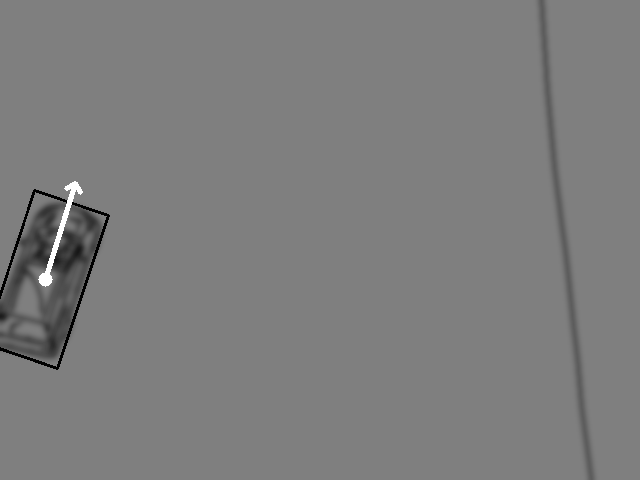

In [21]:
#Bounding box and centre of car
gray = img.copy()
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                        cv2.THRESH_BINARY_INV, 51, 2)

cntrs, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

#uncomment below line to view the contours detected
#cv2.drawContours(img, cntrs, -1, (0, 0, 255), thickness=3)

cntrs = sorted(cntrs, key=lambda x: cv2.contourArea(x), reverse=True)
rotrect = cv2.minAreaRect(cntrs[0])
box = cv2.boxPoints(rotrect)
box = np.int0(box)
print("Edge points of the bounding box:",box)
print(rotrect)
angle = rotrect[-1]
width = rotrect[1][0]
height = rotrect[1][1]
angle = translateRotation(angle, width, height)

result = img.copy()
cv2.drawContours(result,[box],0,(0,0,255),2) #bbox of the car

#centre of car
cX = (box[0][0]+box[2][0])/2    
cY = (box[0][1]+box[2][1])/2
cX = math.floor(cX)
cY = math.floor(cY)
# cX2 = (box[2][0]+box[3][0])/2    
# cY2 = (box[2][1]+box[3][1])/2
# cX2 = math.floor(cX2)
# cY2 = math.floor(cY2)
d = 100
cX2 = cX - d*math.cos(angle)
cY2 = cY - d*math.sin(angle)
cX2 = math.floor(cX2)
cY2 = math.floor(cY2)
cv2.circle(result, (cX, cY), 7, (255, 0, 0), -1) #centre of the car displayed as white dot
cv2.arrowedLine(result, (cX, cY), (cX2, cY2), (255, 0, 0), 3)
cv2_imshow(result)